In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("../data/data.csv")
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [12]:
df.shape

(170653, 19)

In [13]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [14]:
#Check for missing values
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [15]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [ ]:
df.describe

In [16]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

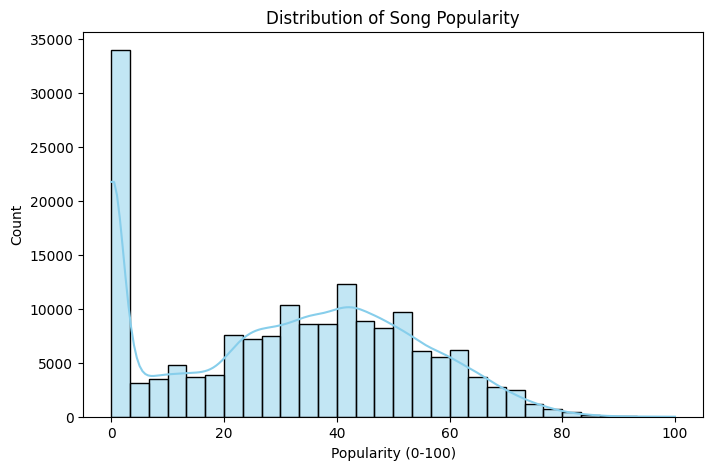

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Popularity distribution
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity (0-100)")
plt.ylabel("Count")
plt.show()

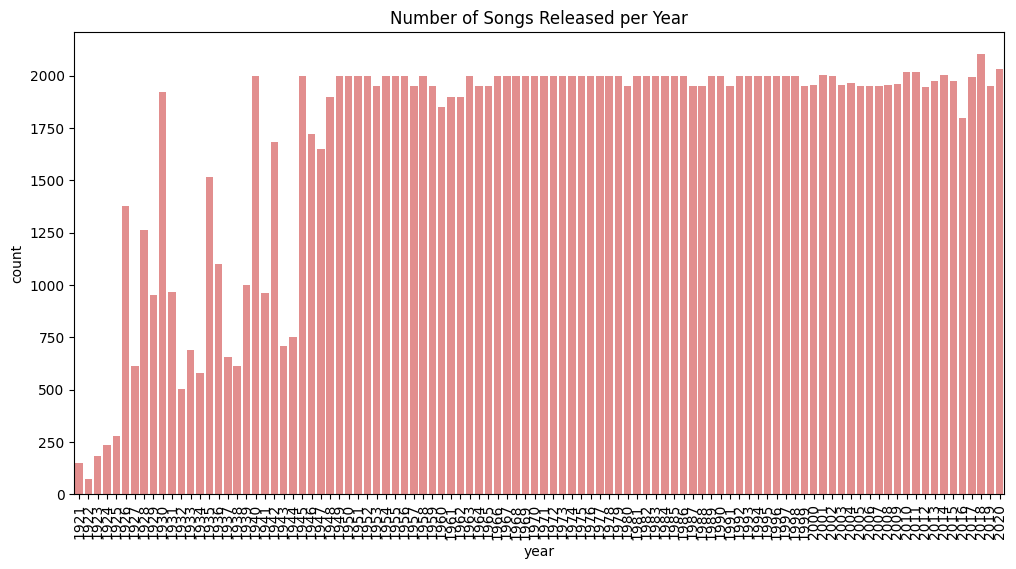

In [18]:
# 2. Songs released per year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="year", color="lightcoral")
plt.xticks(rotation=90)
plt.title("Number of Songs Released per Year")
plt.show()

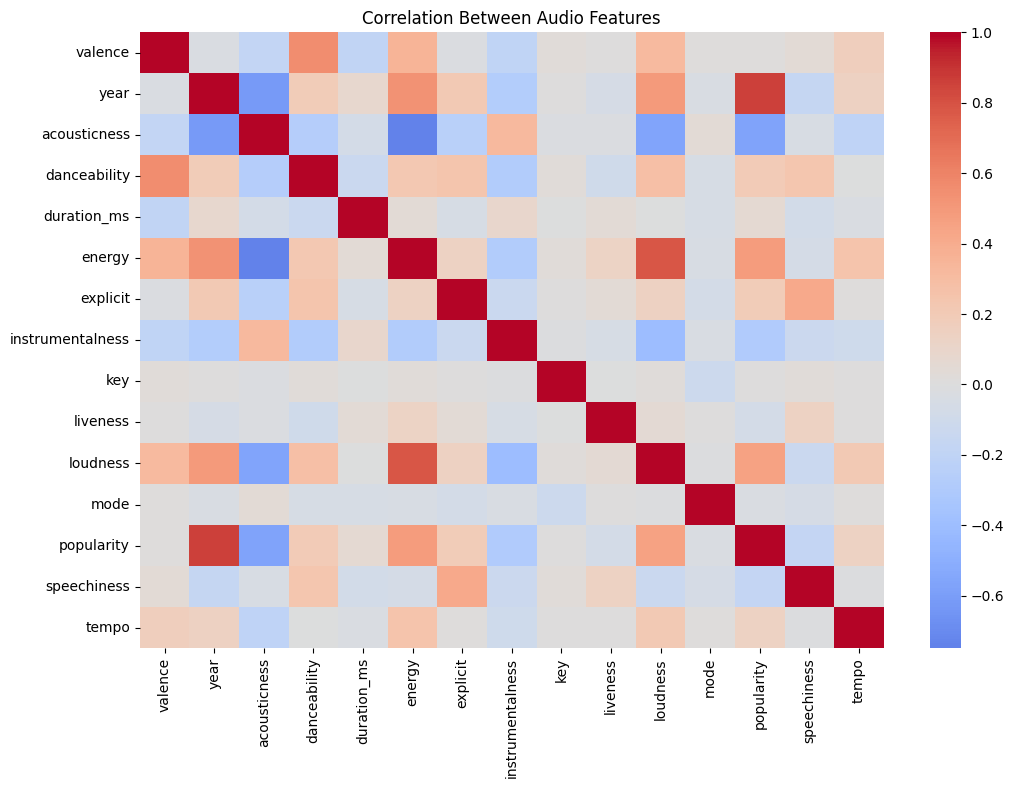

In [19]:
# 3. Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Between Audio Features")
plt.show()

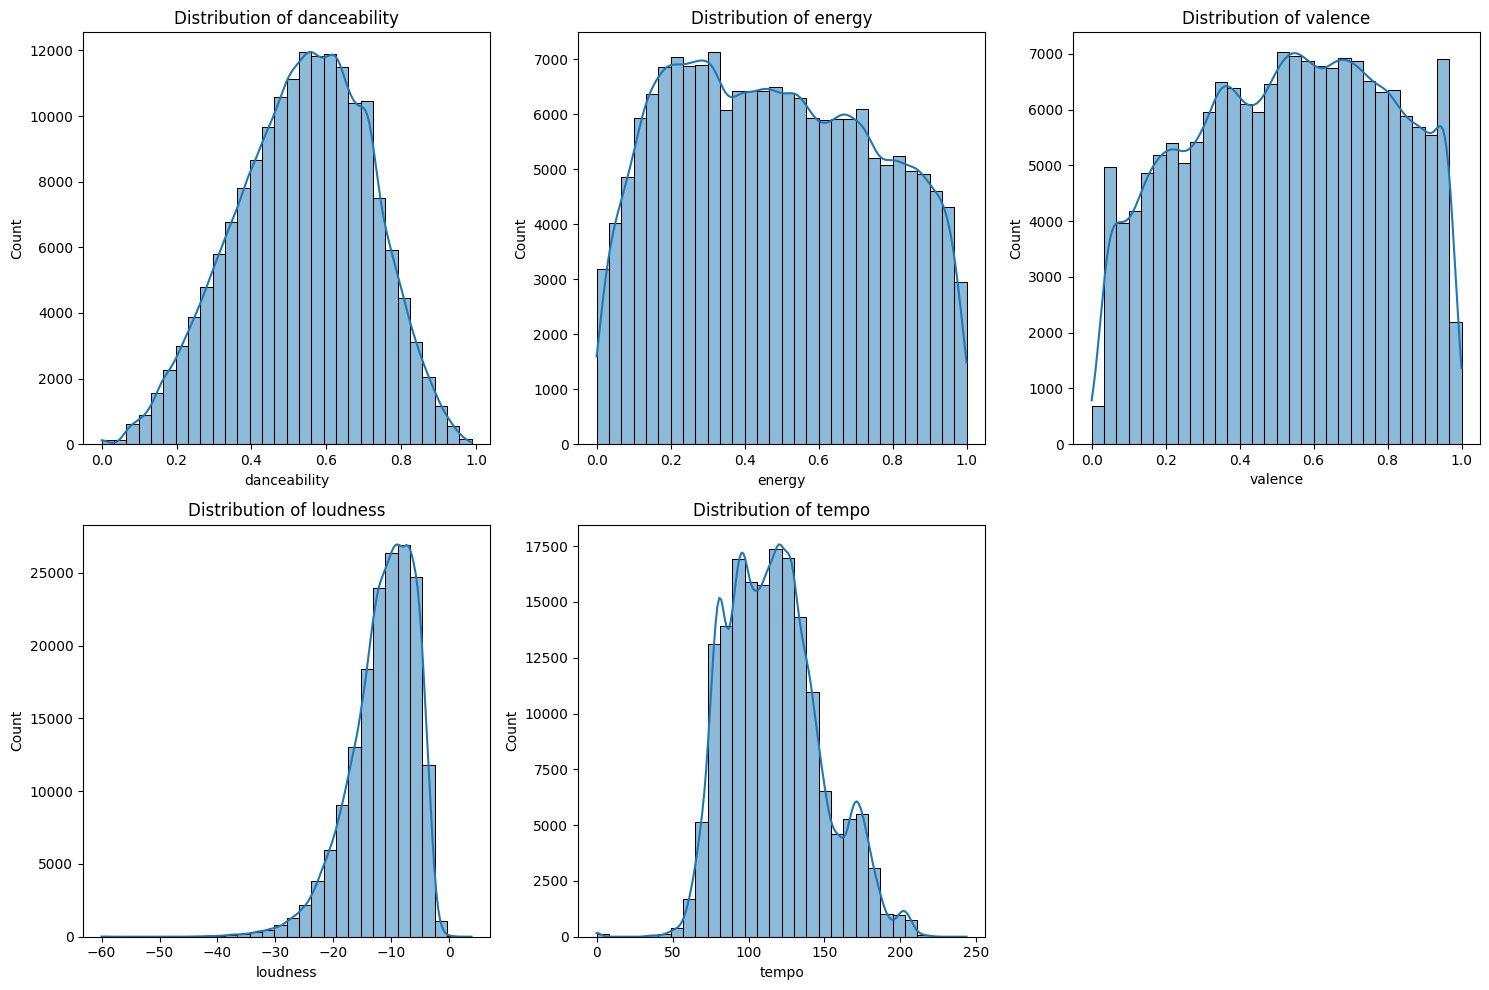

In [21]:
num_features = ['danceability', 'energy', 'valence', 'loudness', 'tempo']

plt.figure(figsize=(15,10))

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

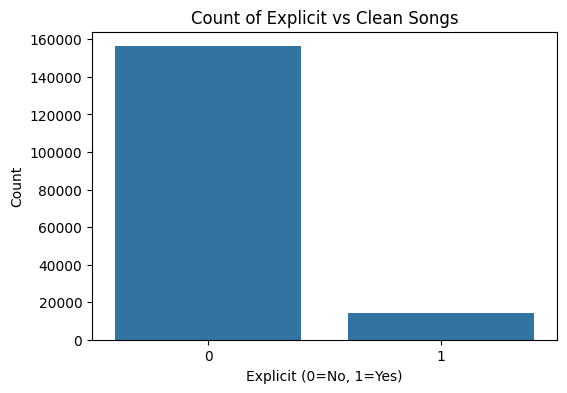

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='explicit', data=df)
plt.title("Count of Explicit vs Clean Songs")
plt.xlabel("Explicit (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

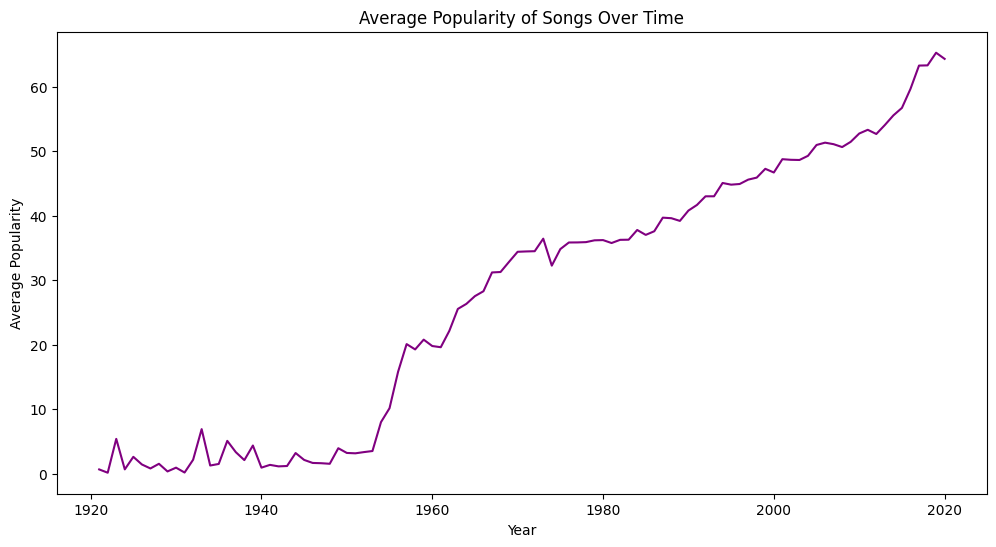

In [24]:
plt.figure(figsize=(12,6))
avg_popularity = df.groupby('year')['popularity'].mean()

sns.lineplot(x=avg_popularity.index, y=avg_popularity.values, color="purple")
plt.title("Average Popularity of Songs Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_34164\1260117899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="mako")


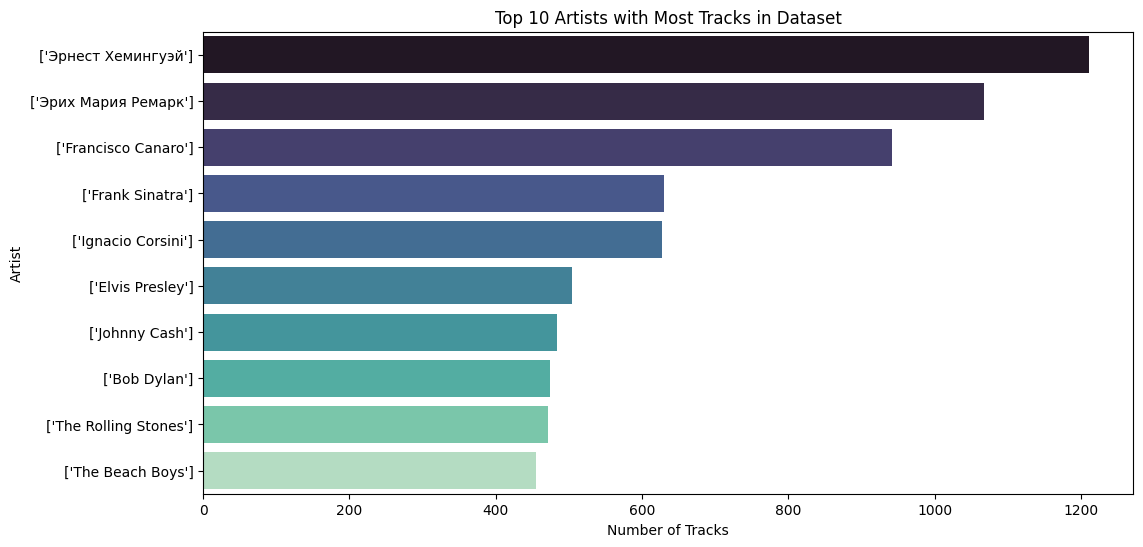

In [25]:
plt.figure(figsize=(12,6))
top_artists = df['artists'].value_counts().head(10)

sns.barplot(x=top_artists.values, y=top_artists.index, palette="mako")
plt.title("Top 10 Artists with Most Tracks in Dataset")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

## Learnings

Popularity is heavily skewed (most songs not popular).

Number of songs released per year exploded after 1960s.

Correlation heatmap shows some features strongly related (e.g., loudness ↔ energy).

Explicit songs are minority (imbalanced dataset).

Average popularity has been increasing over decades.